In [6]:
using QuantumOptics
using PyPlot
#using QuantumControl.Shapes: flattop

In [7]:
w_r = 2*pi*5       # frequency in GHz
w_d = 2*pi*5     # coupling b/t pump and atom
Ω = .008 

0.008

In [4]:
"""
basis = FockBasis(6)
a = destroy(basis)
a_dra = create(basis)

"""

"basis = FockBasis(6)\na = destroy(basis)\na_dra = create(basis)\n\n"

In [8]:
basis = SpinBasis(1//2)
a = sigmam(basis)
a_dra = sigmap(basis)

Operator(dim=2x2)
  basis: Spin(1/2)
     ⋅      1.0+0.0im
     ⋅          ⋅    

In [9]:
# Hamiltonian
H_half =   w_r * a_dra*a + 0.5*identityoperator(basis)

Operator(dim=2x2)
  basis: Spin(1/2)
 31.9159+0.0im      ⋅    
         ⋅      0.5+0.0im

In [10]:
#pulse(t,t0,Ω) = @. Ω*exp(-(t-t0)^2)

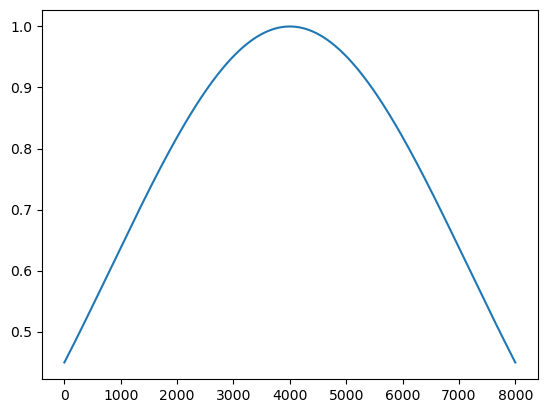

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000994239A0>

In [11]:
tlist = 0:.001:8000;
t_s = [ exp(-(.00000005)*(t-4000)^2) for t in tlist]
plot(tlist, t_s)

In [12]:
ϕ = .785398

0.785398

In [13]:
function H_g(t, ρ)
    #H_f = 0.5*Ω * (a*exp.(im*w_d*t) + a_dra*exp.(-im*w_d*t))
    #exp(-(.000006)*(t-700)^2)
    H_f = .5*Ω*exp(-(.00000005)*(t-4000)^2)*(sin(ϕ)*cos(w_d*t)+cos(ϕ)*sin(w_d*t))*(cos(w_r*t)*sigmay(basis) + sin(w_r*t)*sigmax(basis)) 
    #H_f =.5*Ω*(sin(ϕ)*cos(w_d*t)+cos(ϕ)*sin(w_d*t))*(cos(w_r*t)*sigmay(basis) + sin(w_r*t)*sigmax(basis)) 
    #H_f =  20*exp(-(1\.00001)*(t-700)^2) *sigmay(basis)
    #H_f = 0.5*Ω* flattop(t,T=5, t_rise=.3, func=:blackman) * (a*exp.(im*w_d*t) + a_dra*exp.(-im*w_d*t))
    return H_f  
    
end

H_g (generic function with 1 method)

In [14]:
# Initial state
#ψ0 = fockstate(basis,1);
ψ0 = spinup(basis)
time = [0:.1:8000;];
#time = [0:.1:10;];


In [15]:
tout, ρ = timeevolution.schroedinger_dynamic(time, ψ0, H_g);

In [16]:
"""n = number(basis)
si = real(expect(n, ρ))
plot(tout, si)"""

"n = number(basis)\nsi = real(expect(n, ρ))\nplot(tout, si)"

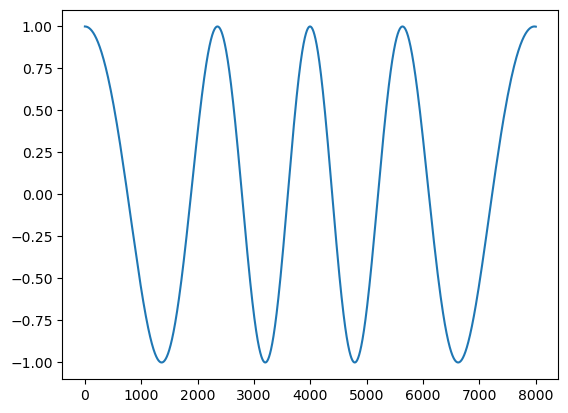

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000993A2CE0>

In [17]:
si = real(expect(sigmaz(basis), ρ));
plot(tout, si)

In [18]:
function H(t, ρ)

    #H_f = .5*Ω*exp(-(.00000005)*(t-4000)^2)*(sin(ϕ)*cos(w_d*t)+cos(ϕ)*sin(w_d*t))*(cos(w_r*t)*sigmay(basis) + sin(w_r*t)*sigmax(basis)) 
    H_f =.5*Ω*(sin(ϕ)*cos(w_d*t)+cos(ϕ)*sin(w_d*t))*(cos(w_r*t)*sigmay(basis) + sin(w_r*t)*sigmax(basis)) 

    return H_f  
    
end

H (generic function with 1 method)

In [19]:
# Initial state
#ψ0 = fockstate(basis,1);
ψ0 = spinup(basis)
time = [0:.1:8000;];

In [20]:
tout, ρ1 = timeevolution.schroedinger_dynamic(time, ψ0, H);

In [21]:
si1 = real(expect(sigmaz(basis), ρ1));


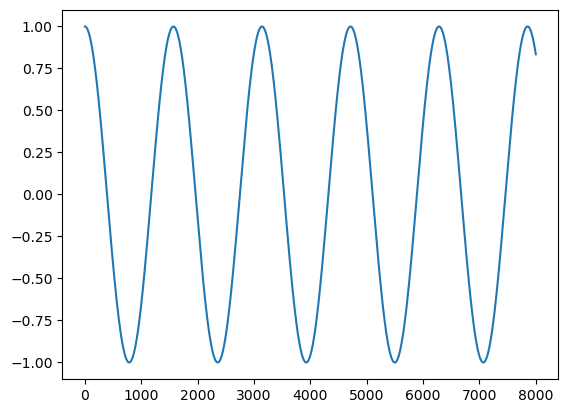

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000994C4550>

In [22]:
plot(tout, si1)
#plot(tout,si)

In [ ]:
findmin(si)

In [ ]:
time = tout[1:315];

In [ ]:
ψ1 = spindown(basis);
tout, ρ = timeevolution.schroedinger_dynamic(time, ψ1, H);

In [ ]:
si = real(expect(sigmaz(basis), ρ))
plot(tout, si)

In [ ]:
using PyPlot
using LsqFit

In [ ]:
@. model(x,p) = cos(x*p[1])
p0 = [0.009]
lb = [0.0001]
up = [.01]

In [ ]:
fit = curve_fit(model, tout, si, p0, lower=lb, upper=up)

In [ ]:
a = fit.param

In [ ]:
t = a .* tout 
r = cos.(t)
plot(tout, r)


In [ ]:
plot(tout, r, "o", tout, si, "r-", linewidth=1)

In [ ]:
using FourierAnalysis, DSP, Plots


In [ ]:
f, sr, t= 50,1000, 512

In [ ]:
v = sinusoidal(2., f, sr, t,0);

In [ ]:
plot(v)